***Script para representar los tipos de clinas geográficas***
***Javier Gutiérrez Corral 27/10/2023***

In [11]:
#Se importan los paquetes
from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline # para que se represente dentro del notebook

100


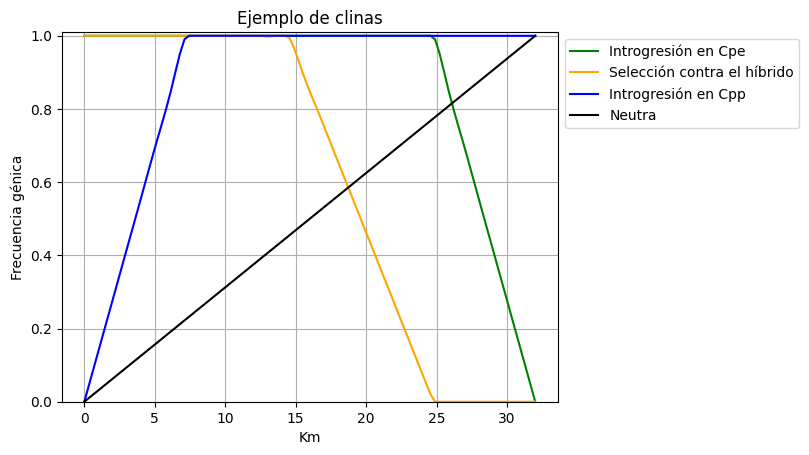

In [12]:
# Se define un valor arbitrario de x para representar las clinas encima
x = np.linspace(0,32,32)

#Se obtendrán los valores de y para cada uno de los tipos de clina

#Primera Y, representando introgresión

L2=[]
count=0
for i in range(32):
    count=count+1
    if count >= 26:
        num=1-((count-25)/7)
        L2.append(num)
    else:
        L2.append(1)
        
y = np.array(L2)
X_Y_Spline = make_interp_spline(x, y) # para creaar una curva suave a partir de los datos
X_ = np.linspace(x.min(), x.max(), 100)
Y_ = X_Y_Spline(X_)
Y_[Y_>1]=1 # al crear la curva suave algunos valores superan el uno con lo que se ajustan a uno
Y_[Y_<0]=0 # al crear la curva suave algunos valores son negativos con lo que se ajustan
print(len(Y_))
Y_[:75]=1 # para representar la frecuencia máxima

#Segunda Y
L3=[]
count=0
for i in range(32):
    count=count+1
    if count >= 16:
        num=1-((count-15)/10)
        L3.append(num)
    else:
        L3.append(1)
        
y2 = np.array(L3)
X_Y_Spline2 = make_interp_spline(x, y2)
X_2 = np.linspace(x.min(), x.max(), 100)
Y_2= X_Y_Spline2(X_2)
Y_2[Y_2>1]=1
Y_2[Y_2<0]=0
Y_2[:40]=1

#Tercera Y

y3=np.flipud(y) # para darle la vuelta al array de introgresión, haciendo así la introgresión para el lado contrario
X_Y_Spline3 = make_interp_spline(x, y3)
X_3 = np.linspace(x.min(), x.max(), 100)
Y_3 = X_Y_Spline3(X_3)
Y_3[Y_3>1]=1
Y_3[Y_3<0]=0
Y_3[25:100]=1

#Cuarta Y

y4=np.linspace(0,1,32)
X_Y_Spline4 = make_interp_spline(x, y4)
X_4 = np.linspace(x.min(), x.max(), 100)
Y_4 = X_Y_Spline4(X_4)

plt.plot(X_, Y_, label="Introgresión en Cpe", color="green")
plt.plot(X_2, Y_2,label="Selección contra el híbrido", color="orange")
plt.plot(X_3, Y_3,label="Introgresión en Cpp", color="blue")
plt.plot(X_4, Y_4,label="Neutra", color="black")

plt.ylim(0, 1.01)
plt.legend(loc="upper left",bbox_to_anchor=(1, 1))
plt.grid(True)
plt.title("Ejemplo de clinas")
plt.xlabel("Km")
plt.ylabel("Frecuencia génica")
plt.savefig("Clinas.jpg",bbox_inches='tight')
plt.show()